In [1]:
import sys
sys.path.append("/usr/lib/spark/python")
sys.path.append("/usr/lib/spark/python/lib/py4j-0.10.4-src.zip")
sys.path.append("/usr/lib/python3/dist-packages")

import os
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"

import os
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "ipython"

from pyspark.mllib.clustering import KMeans, KMeansModel 
from pyspark import SparkConf, SparkContext

from osgeo import gdal
from io import BytesIO

import matplotlib.pyplot as plt
import rasterio
from rasterio import plot
from rasterio.io import MemoryFile

In [2]:
appName = "kmeans_mlib_hdfs"
masterURL="spark://emma0.phenovari-utwente.surf-hosted.nl:7077"

try:
    sc.stop()
except NameError:
    print("A  new Spark Context will be created.")
    
sc = SparkContext(conf = SparkConf().setAppName(appName).setMaster(masterURL))

A  new Spark Context will be created.


In [15]:
file_path = "hdfs:///user/hadoop/spring-index/LastFreeze/1980.tif"
clusters_path = "hdfs:///user/emma/spring-index/BloomFinal/clusters_5_35.tif"

file_data = sc.binaryFiles(file_path).take(1)
file_dataByteArray = bytearray(file_data[0][1])

clusters_data = sc.binaryFiles(clusters_path).take(1)
clusters_dataByteArray = bytearray(clusters_data[0][1])

In [16]:
file_dataset = MemoryFile(file_dataByteArray).open()
print(file_dataset.profile)

clusters_dataset = MemoryFile(clusters_dataByteArray).open()
print(clusters_dataset.profile)

{'dtype': 'uint8', 'compress': 'lzw', 'width': 7808, 'interleave': 'band', 'crs': CRS({'init': 'epsg:4326'}), 'nodata': None, 'driver': 'GTiff', 'tiled': False, 'height': 3892, 'count': 1, 'transform': Affine(0.008983152841195215, 0.0, -126.30312894720473,
       0.0, -0.008983152841195215, 49.25462702827337)}
{'dtype': 'float64', 'width': 7808, 'interleave': 'band', 'crs': CRS({'init': 'epsg:4326'}), 'nodata': nan, 'driver': 'GTiff', 'tiled': False, 'height': 3892, 'count': 1, 'transform': Affine(0.008983152841195215, 0.0, -126.30312894720473,
       0.0, -0.008983152841195215, 49.25462702827337)}


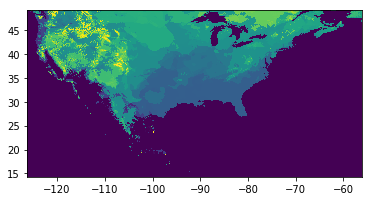

In [17]:
plot.show((file_dataset,1))

/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


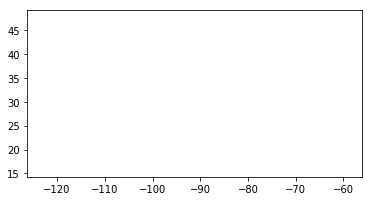

In [18]:
plot.show((clusters_dataset,1))